# Modeling

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
X_train = pd.read_csv('data/xtrain.csv')
X_test = pd.read_csv('data/xtest.csv')

X_test.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,530,12.209188,0.000000,0.75,0.388581,0.630999,1.0,1.0,0.333333,0.333333,...,0.75,1.0,0.0,0.181818,0.25,0.666667,0.00,1.0,1.0,0.0
1,492,11.798104,0.176471,0.75,0.490408,0.389061,1.0,1.0,0.000000,0.333333,...,0.50,1.0,0.0,0.636364,0.00,0.666667,0.75,0.0,0.0,0.0
2,460,11.608236,0.176471,0.75,0.388581,0.329918,1.0,1.0,0.333333,0.000000,...,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0
3,280,12.165251,0.235294,0.75,0.508690,0.399404,1.0,1.0,0.000000,0.333333,...,0.75,1.0,0.0,0.181818,0.50,0.666667,0.75,0.0,0.0,0.0
4,656,11.385092,0.823529,0.25,0.000000,0.050188,1.0,1.0,0.000000,0.333333,...,0.75,1.0,0.0,0.181818,1.00,0.666667,0.50,0.0,0.0,0.0


In [3]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [21]:
feature_df = pd.read_csv('data/selected_features.csv')
features = [f for f in feature_df.iloc[:,0]]

#An imporntant variable that was not selected
features += ['LotFrontage']

In [22]:
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [23]:
X_train = X_train[features]
X_test = X_test[features]

## Lasso Regression

In [24]:
lin_model = Lasso(alpha=0.005, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
pred = lin_model.predict(X_train)
print("Train MSE: {:.2f}".format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print("Train RMSE: {:.2f}".format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))

Train MSE: 1087435415.44
Train RMSE: 32976.29


In [30]:
pred = lin_model.predict(X_test)
print("Test MSE: {:.2f}".format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print("Test RMSE: {:.2f}".format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

Test MSE: 1405259552.26
Test RMSE: 37486.79


Prediction is alright not better than or train set but not massively overfitted

Text(0, 0.5, 'Predicted sale price(log)')

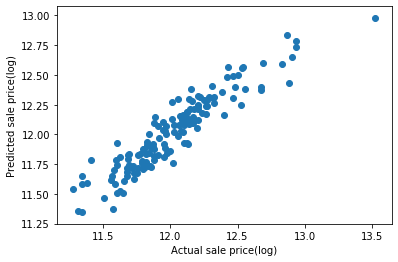

In [32]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel("Actual sale price(log)")
plt.ylabel("Predicted sale price(log)")

No major deviation off of diagonal line which suggests generally good predictions

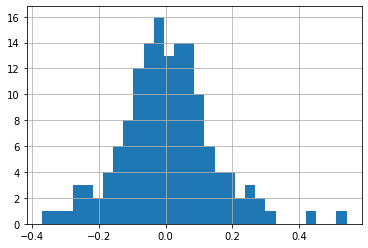

In [34]:
errors = y_test - lin_model.predict(X_test)
errors.hist(bins=30)

Normally distributed errors suggest not larger systemic issues

## Coefficients Plotted

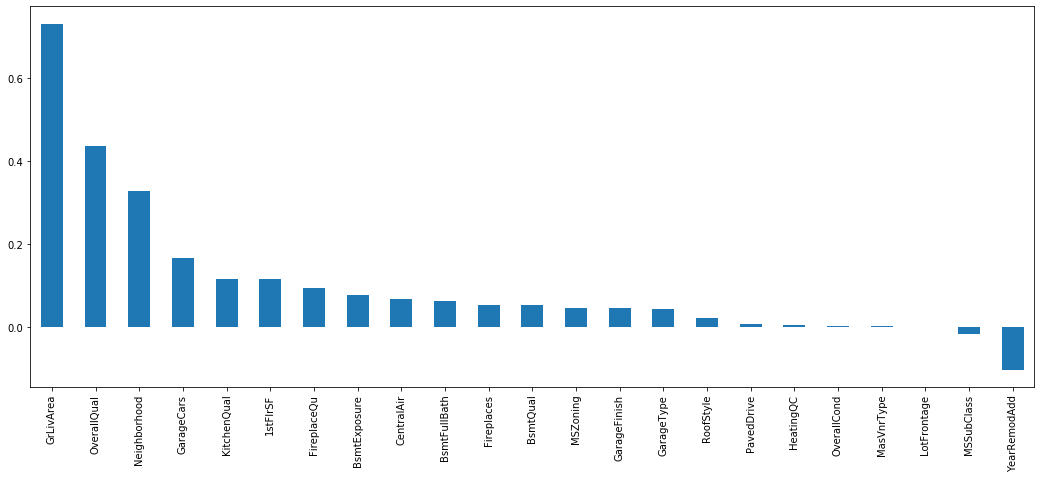

In [42]:
coefficients = pd.Series(lin_model.coef_.ravel())
coefficients.index = features
coefficients.sort_values(inplace=True, ascending=False)


plt.figure(figsize=(18,7))
plt.xlabel("Coeffi")
coefficients.plot.bar()
